## Fake Job Detection using NLP
### Project Prolem Definition 

The goal of this project is to develop a machine learning model that can accurately detect fake job listings. We'll use natural language processing (NLP) techniques to analyze textual data associated with job postings and build a model that can distinguish between genuine and fraudulent listings.



### description
title: The title or name of the job position being advertised.

location: The location(s) where the job is based or available. This could include cities, states, or countries.

department: The specific department or division within the organization to which the job role belongs.

salary_range: The range of salaries offered for the job position, typically specified as a minimum and maximum value.

company_profile: A description of the hiring company, including its background, mission, values, products, and services.

description: A detailed description of the job role, responsibilities, duties, and qualifications required.

requirements: Specific requirements or qualifications that candidates must meet to be considered for the job, such as education, experience, skills, certifications, etc.

benefits: Any additional benefits or perks offered to employees, such as health insurance, retirement plans, vacation days, etc.

telecommuting: Indicates whether the job offers telecommuting or remote work options (1 for yes, 0 for no).

has_company_logo: Indicates whether the job posting includes the company's logo (1 for yes, 0 for no).

has_questions: Indicates whether the job posting includes screening questions for applicants (1 for yes, 0 for no).

employment_type: The type of employment offered for the job, such as full-time, part-time, contract, temporary, etc.

required_experience: The level of experience required for the job role, such as entry-level, mid-level, senior-level, etc.

required_education: The minimum education level required for the job, such as high school diploma, bachelor's degree, master's degree, etc.

industry: The industry or sector to which the job role belongs, such as technology, finance, healthcare, etc.

function: The specific function or area of specialization within the industry, such as sales, marketing, engineering, etc.

fraudulent: Indicates whether the job posting is flagged as fraudulent (1 for yes, 0 for no).

In [59]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from wordcloud import WordCloud

In [60]:
# Download NLTK resources
# nltk.download('punkt')
# nltk.download('stopwords')

### Data Collection:
For this project, we'll use a dataset containing information about job listings, including various attributes such as title, description, requirements, and whether the listing is fraudulent or not. The dataset will serve as the foundation for training and evaluating our machine learning model.


In [61]:
data = pd.read_csv("fake_job_postings.csv")
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


### Data Cleaning, Exploration, and Pre-processing:
Before we can build a machine learning model, it's essential to clean and pre-process the data. This involves tasks such as handling missing values, encoding categorical variables, and preparing the text data for analysis. We'll explore the dataset to gain insights into its characteristics and ensure it's ready for modeling.

In [62]:
fake = data[data['fraudulent'] == 1]
fake

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
98,99,IC&E Technician,"US, , Stocton, CA",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abilitie...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
144,145,Forward Cap.,NaN,NaN,NaN,NaN,The group has raised a fund for the purchase o...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,1
173,174,Technician Instrument & Controls,US,Power Plant & Energy,NaN,Edison International and Refined Resources hav...,Technician Instrument &amp; ControlsLocation D...,JOB QUALIFICATIONS-Ability to understand proce...,"we are a team of almost 8,000 employees who he...",0,1,1,Full-time,Mid-Senior level,Certification,Electrical/Electronic Manufacturing,Other,1
180,181,Sales Executive,"PK, SD, Karachi",Sales,NaN,NaN,Sales Executive,Sales Executive,Sales Executive,0,0,0,NaN,NaN,NaN,NaN,Sales,1
215,216,IC&E Technician Mt Poso,"US, CA, Bakersfield, CA / Mt. Poso",Oil & Energy,95000-115000,...,"IC&amp;E Technician | Bakersfield, CA Mt. Poso...","QualificationsKnowledge, Skills &amp; Abiliti...",BENEFITSWhat is offered:Competitive compensati...,0,1,1,Full-time,Mid-Senior level,High School or equivalent,Oil & Energy,Other,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17827,17828,Student Positions Part-Time and Full-Time.,"US, CA, Los Angeles",NaN,NaN,NaN,Student Positions Part-Time and Full-Time.You ...,NaN,NaN,0,0,0,Part-time,NaN,NaN,NaN,NaN,1
17828,17829,Sales Associate,"AU, NSW, Sydney",Sales and Marketing,NaN,NaN,LEARN TO EARN AN EXECUTIVE LEVEL INCOMEFULL TR...,What You Can Do. • Have the potential to earn ...,Who We Are We are a Global Leadership Developm...,0,0,1,NaN,NaN,NaN,NaN,NaN,1
17829,17830,Android Developer,"PL, MZ, Warsaw",NaN,NaN,NaN,inFullMobile Sp. z o.o. is a mobile software d...,• A proven track record in Android / JAVA proj...,attractive salary (adequate to the candidate s...,0,0,0,NaN,NaN,NaN,NaN,NaN,1
17830,17831,Payroll Clerk,"US, NY, New York",NaN,NaN,NaN,JOB DESCRIPTIONWe are seeking a full time payr...,JOB REQUIREMENTS• High school diploma or eq...,We offer a competitive salary and benefits pac...,0,0,0,Full-time,NaN,NaN,Apparel & Fashion,Accounting/Auditing,1


In [63]:
data['fraudulent'].value_counts()

fraudulent
0    17014
1      866
Name: count, dtype: int64

In [64]:
data.shape

(17880, 18)

In [65]:
data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [66]:
# Data preprocessing
# Drop irrelevant columns
data.drop(['job_id', 'location', 'department', 'salary_range', 'company_profile', 'benefits', 'telecommuting', 'has_company_logo', 'has_questions'], axis=1, inplace=True)

In [67]:
# Fill missing values
data['employment_type'].fillna('Unknown', inplace=True)
data['required_experience'].fillna('Unknown', inplace=True)
data['required_education'].fillna('Unknown', inplace=True)

In [68]:
# Combine text data
data['text_data'] = data['title'] + ' ' + data['description'] + ' ' + data['requirements']

In [69]:
data.head()

,title,description,requirements,employment_type,required_experience,required_education,industry,function,fraudulent,text_data
0,Marketing Intern,"Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Other,Internship,Unknown,NaN,Marketing,0,"Marketing Intern Food52, a fast-growing, James..."
1,Customer Service - Cloud Video Production,Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,Full-time,Not Applicable,Unknown,Marketing and Advertising,Customer Service,0,Customer Service - Cloud Video Production Orga...
2,Commissioning Machinery Assistant (CMA),"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Unknown,Unknown,Unknown,NaN,NaN,0,Commissioning Machinery Assistant (CMA) Our cl...
3,Account Executive - Washington DC,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,Account Executive - Washington DC THE COMPANY:...
4,Bill Review Manager,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,Bill Review Manager JOB TITLE: Itemization Rev...


In [70]:
# Clean text data
stop_words = set(stopwords.words('english'))

def clean_text(text):
    if isinstance(text, str):
        text = text.lower()  # Convert text to lowercase
        text = nltk.word_tokenize(text)  # Tokenize text
        text = [word for word in text if word.isalnum()]  # Remove non-alphanumeric characters
        text = [word for word in text if word not in stop_words]  # Remove stopwords
        text = ' '.join(text)  # Join tokens back into a string
        return text
    else:
        return ''

data['clean_text_data'] = data['text_data'].apply(clean_text)

In [91]:
data['clean_text_data']

0        marketing intern food52 james beard online foo...
1        customer service cloud video production organi...
2        commissioning machinery assistant cma client l...
3        account executive washington dc company esri e...
4        bill review manager job title itemization revi...
                               ...                        
17875    account director distribution case first time ...
17876    payroll accountant payroll accountant focus pr...
17877    project cost control staff engineer cost contr...
17878    graphic designer nemsia studios looking experi...
17879    web application developers vend award winning ...
Name: clean_text_data, Length: 17880, dtype: object

In [92]:
# Split the data into training and testing sets
X = data['clean_text_data']
y = data['fraudulent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Feature Visualization:
To better understand the data and its characteristics, we'll visualize the features using appropriate techniques. This will help us identify patterns, correlations, and potential relationships between features and the target variable, which can inform our feature selection and modeling decisions.

Text(0.5, 0, 'Counts')

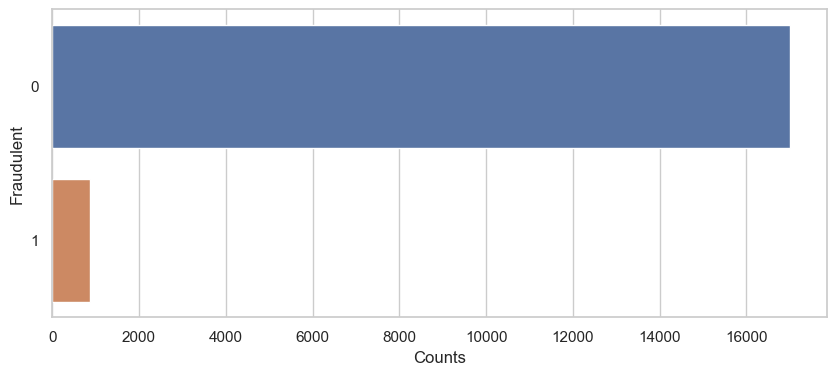

In [73]:
plt.figure(figsize= (10,4))
sns.countplot(y = 'fraudulent', data = data )
plt.ylabel("Fraudulent")
plt.xlabel("Counts")

In [74]:
exp = dict(data.required_experience.value_counts())

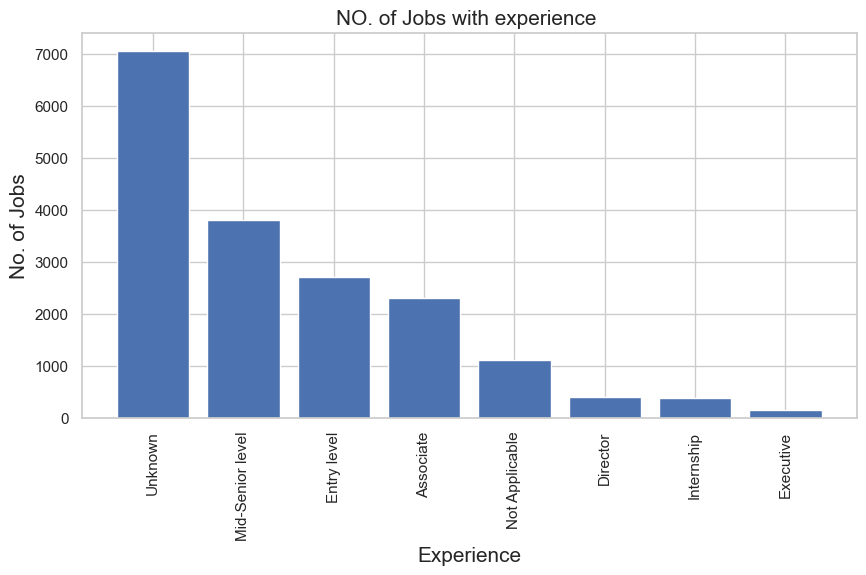

In [75]:
plt.figure(figsize=(10,5))
sns.set_theme(style = "whitegrid")
plt.bar(exp.keys(), exp.values())
plt.title("NO. of Jobs with experience ", size =15)
plt.xlabel("Experience", size =15)
plt.ylabel("No. of Jobs", size =15)
plt.xticks(rotation =90)
plt.show()

In [76]:
edu = dict(data.required_education.value_counts()[:7])
edu

{'Unknown': 8105,
 "Bachelor's Degree": 5145,
 'High School or equivalent': 2080,
 'Unspecified': 1397,
 "Master's Degree": 416,
 'Associate Degree': 274,
 'Certification': 170}

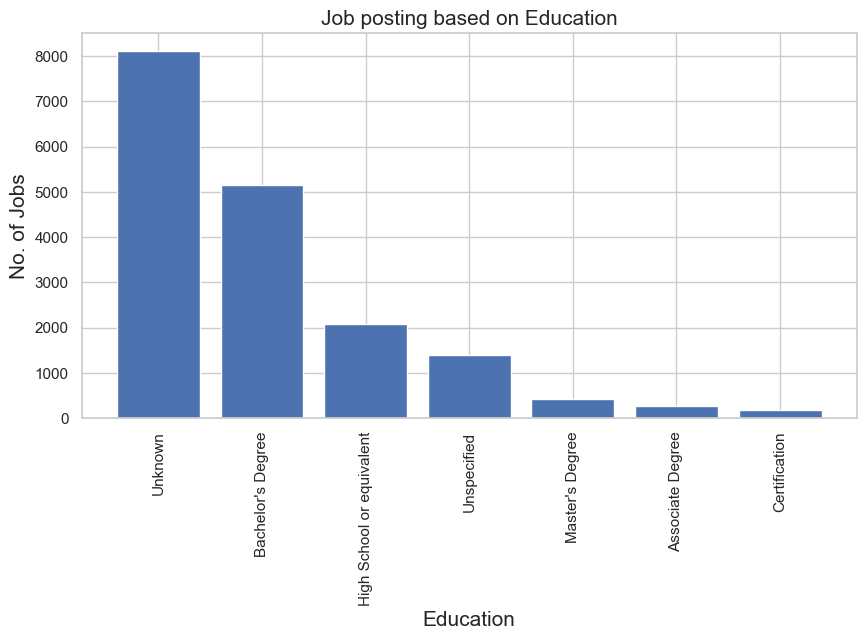

In [77]:
plt.figure(figsize=(10,5))
sns.set_theme(style = "whitegrid")
plt.bar(edu.keys(), edu.values())
plt.title("Job posting based on Education", size =15)
plt.xlabel("Education", size =15)
plt.ylabel("No. of Jobs", size =15)
plt.xticks(rotation = 90)
plt.show()

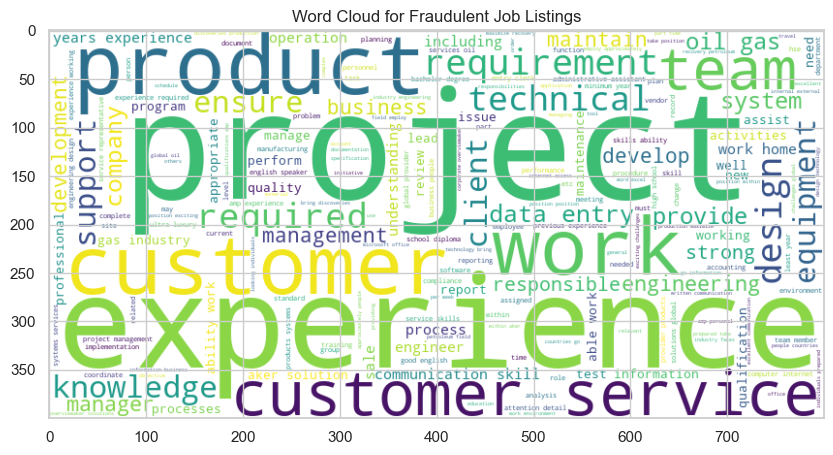

In [78]:
# Generate word cloud for fraudulent job listings
fraudulent_text = ' '.join(data[data['fraudulent'] == 1]['clean_text_data'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(fraudulent_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Fraudulent Job Listings')
plt.axis('on')
plt.show()

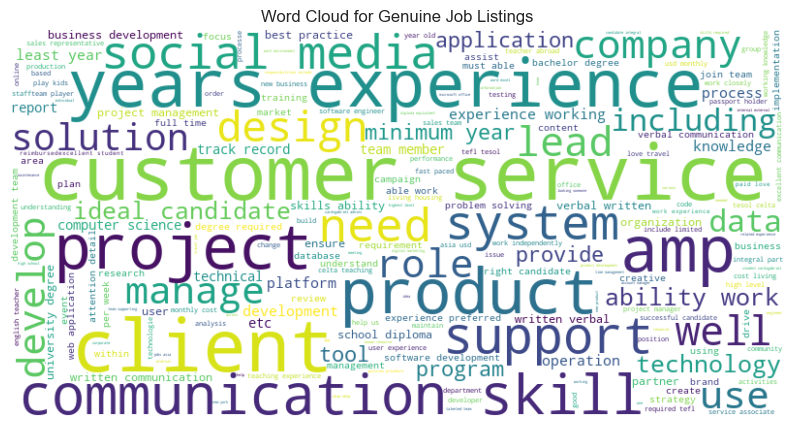

In [79]:
# Generate word cloud for genuine job listings
genuine_text = ' '.join(data[data['fraudulent'] == 0]['clean_text_data'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genuine_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Genuine Job Listings')
plt.axis('off')
plt.show()

In [80]:
# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000) # Limiting to top 5000 features
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


### Modeling:
With the data pre-processed, we'll proceed to build a machine learning model for fake job listing detection. We'll experiment with different algorithms and techniques, including NLP methods, to develop a robust model that can effectively classify job listings as genuine or fake.



In [81]:
# Modeling 
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

In [82]:
# Predictions
y_pred = model.predict(X_test_tfidf)

### Evaluating:
Once the model is trained, we'll evaluate its performance using appropriate metrics to assess its accuracy and effectiveness in detecting fake job listings. We'll analyze the results and fine-tune the model as needed to improve its performance further.

In [83]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9773489932885906


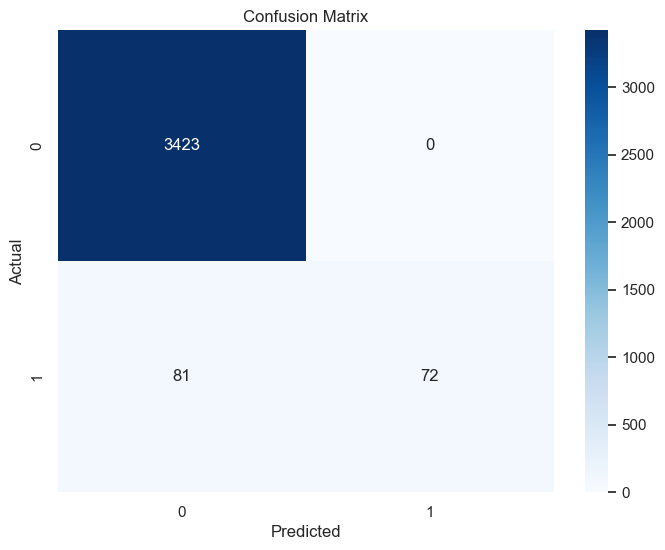

In [84]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [85]:
# Print F1 score and recall from classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3423
           1       1.00      0.47      0.64       153

    accuracy                           0.98      3576
   macro avg       0.99      0.74      0.81      3576
weighted avg       0.98      0.98      0.97      3576



In [86]:
def classify_job_posting(job_post_details, vectorizer, model):
    # Clean and preprocess job post details
    clean_job_post = clean_text(job_post_details)
    # Vectorize job post details using TF-IDF vectorizer
    vectorized_job_post = vectorizer.transform([clean_job_post])
    # Make prediction
    prediction = model.predict(vectorized_job_post)
    # Interpret prediction
    if prediction[0] == 1:
        return "FAKE"
    else:
        return "REAL"

In [87]:
# Assuming 'vectorizer' and 'model' are the trained TF-IDF vectorizer and model respectively
job_post_details = '''Job Title: Galactic Code Sorcerer

Location: Atlantis, Underwater Kingdom, India

Company: Mythical Oceans Tech Solutions Pvt. Ltd.

About Us:
Mythical Oceans Tech Solutions Pvt. Ltd. is a pioneering tech company operating from the mythical underwater kingdom of Atlantis, India. We specialize in developing software solutions for aquatic civilizations and mythical beings. Our innovative approaches blend cutting-edge technology with ancient oceanic magic to deliver unparalleled tech experiences.

Job Description:
We are seeking a highly creative and technically gifted Galactic Code Sorcerer to join our elite team. The ideal candidate will have extensive experience in underwater coding environments, a deep understanding of Atlantean programming languages, and the ability to work closely with mermaids, sea dragons, and other marine creatures.

Key Responsibilities:

Underwater Coding: Develop and implement advanced software solutions using Atlantean programming languages such as AquaScript and Poseidon++.
Magic Integration: Write code that seamlessly integrates with oceanic magic, ensuring our applications perform flawlessly in various underwater conditions.
Aquatic Debugging: Identify and resolve software issues caused by underwater currents, pressure changes, and magical interference from sea creatures.
Marine Collaboration: Work closely with mermaids, sea dragons, and other mythical marine beings to gather requirements and deliver software that meets their unique needs.
Enchanted Documentation: Maintain detailed and enchanted documentation for all systems developed, ensuring it is accessible to both technical and non-technical marine beings.
Innovative Solutions: Stay updated with the latest in both technology and oceanic magic, seeking opportunities to incorporate new advancements into our products.
Qualifications:

Bachelor’s degree in Marine Computer Science, Atlantean Technology, or a related field.
Minimum of 7 years experience in underwater software development.
Proficiency in Atlantean programming languages and underwater development tools.
Strong understanding of oceanic magic algorithms and enchantment-based coding practices.
Excellent problem-solving skills and attention to detail.
Ability to communicate effectively with both human and marine clients.
Preferred Skills:

Experience with deep-sea database management and enchanted data structures.
Knowledge of ancient Atlantean runes and their application in modern software.
Familiarity with aquatic cloud platforms such as OceanCloud and CoralNet.
Ability to work under extreme underwater pressure and in the presence of magical marine creatures.
Understanding of deep-sea data security practices and protections against dark magic.
Compensation:

Competitive salary with bonuses paid in pearls and enchanted shells.
Comprehensive health insurance, including magical healing treatments.
Access to advanced underwater artifacts and continuous professional development.
Flexible work schedule with options for remote work from different aquatic locations.
Annual retreat to the Lost City of Atlantis for rest and rejuvenation.
Application Process:

To apply, please submit your enchanted resume, a cover letter detailing your relevant experience and any magical projects you have worked on, and three references from reputable figures in the underwater community to careers@mythicaloceanstech.in by the next high tide.

Mythical Oceans Tech Solutions Pvt. Ltd. is an equal opportunity employer. We celebrate diversity and are committed to creating an inclusive environment for all employees and mythical marine beings.'''
# Replace with actual job post details
result = classify_job_posting(job_post_details, vectorizer, model)
print("Classification Result:", result)

Classification Result: REAL


In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample documents
documents = [
    "I love dogs",
    "I love cats",
    "Dogs are great",
    "Cats are awesome"
]

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the documents
tfidf_matrix = vectorizer.fit_transform(documents)

# Convert to a dense matrix and display
print(tfidf_matrix.toarray())

# Display the feature names
print(vectorizer.get_feature_names_out())


[[0.         0.         0.         0.70710678 0.         0.70710678]
 [0.         0.         0.70710678 0.         0.         0.70710678]
 [0.52640543 0.         0.         0.52640543 0.66767854 0.        ]
 [0.52640543 0.66767854 0.52640543 0.         0.         0.        ]]
['are' 'awesome' 'cats' 'dogs' 'great' 'love']
